<div align='right'>
    <h1>Kmeans</h1>
<div dir 'rtl' align='justify'>
<div dir='rtl'style="text-align: right">
در اولین قسمت از این تکلیف ، شروع به سگمنت عکسمان میکنیم و از کتاب خانه های opencv استفاده میکنیم.   
<br>
<div dir='rtl'style="text-align: right">
با استفاده از این کتابخانه ، عکسمان را میخوانیم و نمایش میدهیم.
</div> 

In [5]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
original_imge=cv2.imread('D:/lessons/calculation AI/estaki-nourbakhsh.jpg')

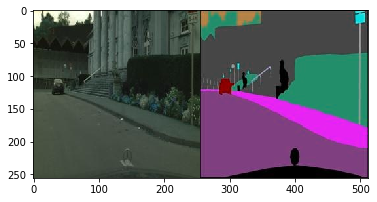

In [199]:
plt.imshow(original_imge, cmap='gray')

<div dir='rtl'style="text-align: right">
چون که shape عکس ما اینگونه است باید عکس ورودی و خروجی را از هم جدا سازیم.  
<br>
<div dir='rtl'style="text-align: right">
مشاهده میکنیم که عکس ما از 256 سطر و 256 +256 ستون و 3 کانال RGB تشکلیل شده است.
</div> 

In [200]:
original_imge.shape

(256, 512, 3)

In [201]:
original_input = original_imge[0:256,0:256,:]

In [202]:
original_input.shape

(256, 256, 3)

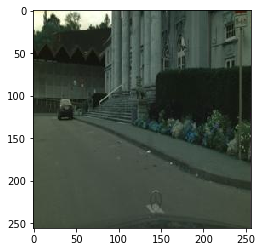

In [203]:
plt.imshow(original_input, cmap='gray')

<div dir='rtl'style="text-align: right">
ابتدا برای اینکه هر پیکسل یک داده محسوب میشود باید ماتریس عکسمان را به RGB value تبدیل کنیم .و چون که ورودی ما یک ماتریس سه بعدی است یعنی  سطر و ستون و کانال ها ، برای اینکه بتوانیم ماتریس را به عنوان ورودی استفاده کنیم لازم است آن را به دو بعد کاهش دهیم. برای این کار سطر را در ستون ضرب میکنیم و آن را reshape میکنیم تا ماتریس vectorized حاصل شود.    
<br>
</div> 

In [204]:
img = cv2.cvtColor(original_input,cv2.COLOR_BGR2RGB)

In [205]:
vectorized = img.reshape((-1,3))

In [206]:
vectorized.shape

(65536, 3)

In [207]:
vectorized = np.float32(vectorized)

<div dir='rtl'style="text-align: right">
 cv2.TermCriteria_EPS بیانگر این است که اگر الگوریتم ما به دقت مورد نظر رسید دیگر ایتریشن را تمام کند.
<br>
<div dir='rtl'style="text-align: right">
 cv2.TermCriteria_MAX_ITER بیانگر این است که الگریتم را پس از max_iteration  متوقف کن.
 هر دوی این عبارات که در قسمت criteria مشخص شده است بیانگر این است که هنگامی که الگوریتم به دقت مورد نظر دست یافت و تعداد ایتریشن مورد نظر را پیمود سپس متوقف کن.
در قسمت بعدی K  بیانگر تعداد کلاستر هاییست که مد نظر ماست. چون در تصویر ground truth هشت رنگ مجزا مشاهده میکنیم.
</div> 

In [12]:
criteria = (cv2.TermCriteria_EPS + cv2.TermCriteria_MAX_ITER,10,1.0)

In [13]:
K = 8
attempts=10

<div dir='rtl'style="text-align: right">
 خروجی الگوریتم همانطور که مشخص است ،تصویر مارا لیبل گذاری میکند و centers هم بیانگر مراکز خوشه است.الگوریتم kmeans برای خوشه بندی تصاویر به رنگ پیکسل ها توجه دارد و پیکسل هایی که RGB value یکسانی دارند را در یک خوشه قرار میدهد.
<br>
در نهایت تصویر را بازسازی میکنیم و در شکل نمایش میدهیم.
</div> 

In [14]:
_, labels, (centers) = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

In [15]:
centers = np.uint8(centers)

In [16]:
res = centers[labels.flatten()]
result_image = res.reshape((img.shape))

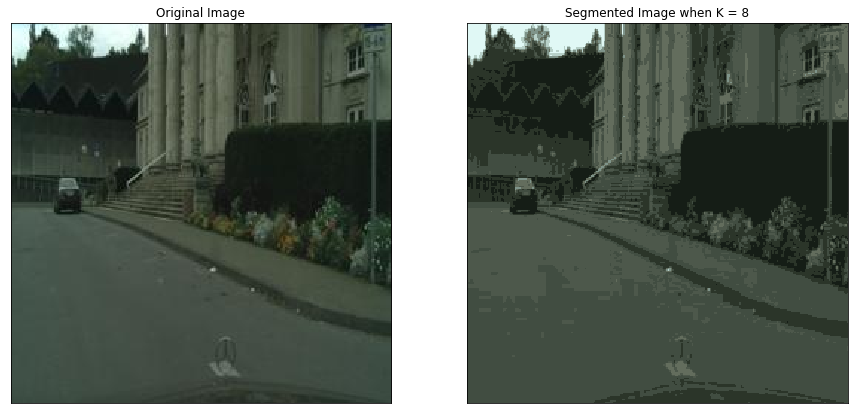

In [17]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

<div dir='rtl'style="text-align: right">
حال برای ارزیابی تصویر کلاستر شده با تصویر ground truth نیاز داریم تا تصویر ground truth را خوانده و سپس با آن ارزیابی کنیم. 
</div> 

In [7]:
ground_truth_image = original_imge[0:256,256:512,:]

In [8]:
ground_truth_image.shape

(256, 256, 3)

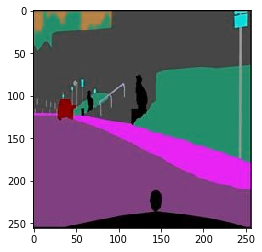

In [20]:
plt.imshow(ground_truth_image, cmap='gray')

In [9]:
gd = cv2.cvtColor(ground_truth_image,cv2.COLOR_BGR2RGB)
gd.shape

(256, 256, 3)

<div dir='rtl'style="text-align: right">
دلیل اینکه ما دوباره تصویر ground truth را کلاستر کرده ایم به خاطر این است که این تصویر دارای نویز است و همانطور که در سلول زیر مشاهده میکنید 10321 رنگ متفاوت ،یعنی 
RGB value متفاوت دارد. در صورتی که ما برای ارزیابی به یک تصویر سگمنت شده نیاز داریم.
زیرا تنها در عکس هشت رنگ متفاوت میبینیم پس باید هشت لیبل متفاوت نیز وجود داشته باشد.
</div> 

In [10]:
u=np.unique(gd.reshape(-1, gd.shape[2]), axis=0)
u.shape

(10321, 3)

In [23]:
vectorized_gd = gd.reshape((-1,3))

In [24]:
vectorized_gd = np.float32(vectorized_gd)

In [25]:
criteria = (cv2.TermCriteria_EPS + cv2.TermCriteria_MAX_ITER,10,1.0)

In [232]:
K=8
attempts = 10

In [233]:
_, labels_gd, (centers_gd) = cv2.kmeans(vectorized_gd, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

In [234]:
centers_gd = np.uint8(centers_gd)

In [235]:
res_gd = centers_gd[labels_gd.flatten()]
result_image_gd = res_gd.reshape((ground_truth_image.shape))

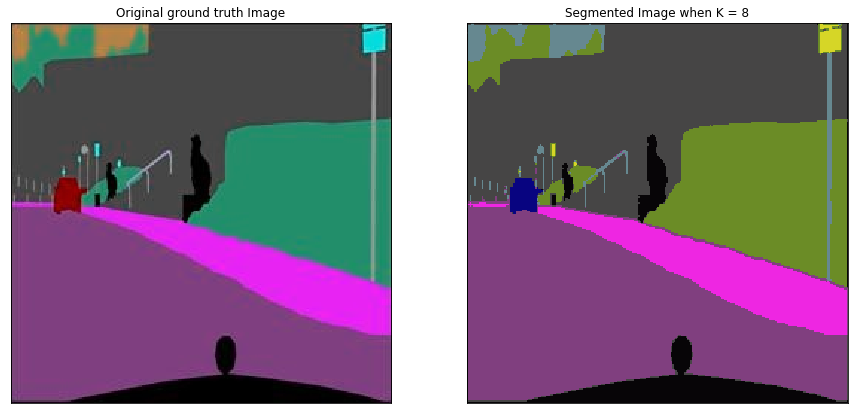

In [236]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(ground_truth_image)
plt.title('Original ground truth Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image_gd)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

<div dir='rtl'style="text-align: right">
پس از کلاستر کردن تصویر ground truth میبینیم که تصویر کاملا سگمنت شده 
<br> 
centers_gd نمایانگر هشت RGB value متفاوت است که برابر تعداد خوشه های ماست.
centers_gd رنگ هارو به ترتیب لیبل های آن ها میدهد. یعنی همانطور که در سلول بعدی مشخص است  لیبل 0 به رنگ زرد که متعلق به کلاس علایم رانندگی است مپ شده است.لیبل 1 به رنگ بنفش روشن که در تصویر هست و همچینین الی آخر


In [238]:
centers_gd

array([[214, 214,  39],
       [238,  38, 226],
       [  7,   5,   7],
       [ 70,  69,  69],
       [102, 136, 144],
       [128,  63, 127],
       [  8,   4, 128],
       [107, 140,  38]], dtype=uint8)

In [32]:
#label 0 ---> yellow(علایم)
#label 1 ---> light purple
#label 2 ---> black
#label 3 ---> gray
#label 4 ---> light blue (for sky)
#label 5 ---> dark purple
#label 6 ---> dark blue
#label 7 ---> green


<div dir='rtl'style="text-align: right">
در این سلول تابع ارزیابی را نوشته ایم. این تابع به اینگونه کار میکند که در for اول ،مکان پیکسل هایی که label های بین 0 تا هفت خورده اند را مشخص میکند.
ما برای اینکه محاسبات ما زمان کمتری بگیرد از توابع numpy استفاده کرده ایم.
label که خروجی الگوریتم kmeans. یک آرایه ی 65536 است که اعداد بین صفر تا هفت را دارد 
</div> 

<div dir='rtl'style="text-align: right">
یعنی نحوه ی ذخیره ی مختصات پیکسل ها به اینگونه است :سطر *256 +ستون
در for دوم نیز همانند for اول متختصات پیکسل هاور در تصویر grounth truth  به دست می آوریم.
در مرحله ی بعد هر خوشه از تصویر اولیه ی خود را با خوشه های تصویر ground truth  که هر کدام بیانگر یک کلاس اشتراک میگیریم.، تاببینیم در تصویر اول ، در مکان هایی که خوشه لیبل صفر خورده است ، در این مختصات ها تصویر ground truth ما شامل چه لیبل هایی است که هرکدام بیانگر یه کلاس است. سپس بررسی میکنیم که خوشه ی های ما  با کدام لیبل ها در تصویر ground truth در آن مختصات تعداد پیکسل بیشتری اشتراک دارند. سپس در خورجی تابع مشاهده میکنیم که به ازای هر هشت خوشه در تصویر ورودی بیشترین تعداد پیکسل مپ شده آمده است که بیانگر پیکسل هاییست که درست لیبل خورده اند . در مرحله ی اخر هم جمع تعداد پیکسل های درست را (پیکسل هایی که به درستی برچسب خورده اند)خ بر کل پیکسل ها  در تصویر ورودی تقسیم میکنیم تا دقت حاصل شود
</div> 

In [132]:
arr=[]
arr2=[]
for i in  np.unique(labels):
    q = np.where(labels==i)
    p=q[0]
    max_match=0
    for j in np.unique(labels_gd):
        k = np.where(labels_gd==j)
        t=k[0]
        aa1=np.intersect1d(p,t)
        arr=aa1.shape[0]
        #print(arr)
        if arr> max_match:
            max_match=arr
    print(max_match)
    arr2.append(max_match)
max_truth=0
for v in arr2:
    max_truth+=v
print("the total number of true labels:",max_truth)  

170
3133
14580
865
7597
4983
109
5605
the total number of true labels: 37042


In [133]:
print("the accuracy of the Kmeans with k=8 :",(max_truth/vectorized.shape[0])*100)

the accuracy of the Kmeans with k=8 : 56.5216064453125


<div dir='rtl'style="text-align: right">
در سلول بالا دقت را بررسی کردم و فهمیدیم که به دقت 56.5 میرسد. در چند سلول بعد سعی در این داریم که جداگانه تعداد و مختصات پیکسل های تصویر ground truth را محاسبه کنیم. در واقع میخواهیم بدانیم از هر لیبل به چه تعداد و در چه مختصات هایی داریم. در واقع میخواهیم فرآیند اینکه لیبل ها در ارزیابی چگونه به یکدیگر مپ میشوند را بهتر مشاهده کنیم k متناسب با روش elbow، چون تعداد خوشه ها در تصویر اولیه با تصویر ground truth برابر نیستند پس نمیتوان به شیوه ی بالا ارزیابی کرد.برای ارزیابی در  مرحله ی بعد جداگانه هر خوشه تصویر اولیه را با لیبل های تصویر ground truth اشتراک میگیریم و تعداد لیبل درست را نمایش میدهیم..  
</div> 

In [239]:
e=np.where(labels_gd==0)
f=e[0]
f.shape

(249,)

<div dir='rtl'style="text-align: right">
در سلول زیر مکان پیکسل هایی که در تصویر groung rtuth لیبل 0 خورده اند و متعلق به رنگ زرد هستند را به صورت X , y مشاهده میکنیم.و به تفکیک تعداشان را نیز در سلول بالا مشاهده میکنیم.
در سلول های بعد ، مکان و تعداد هر رنگ یا هر لیبل را یافته ایم. این کار را برای ارزیابی با k=3 که در البو متد حاصل میشود میکنیم. 
</div> 

In [243]:
#find the index of yellow
COLOR = (214,214,39)
indices = np.where(np.all(result_image_gd == COLOR, axis=-1))
indexes = zip(indices[0], indices[1])
yellow=[]
for i in indexes:
    yellow.append(i)

yellow

[(1, 237),
 (1, 238),
 (2, 237),
 (2, 238),
 (2, 239),
 (2, 240),
 (2, 241),
 (2, 242),
 (2, 243),
 (2, 244),
 (2, 245),
 (2, 246),
 (2, 247),
 (2, 248),
 (2, 249),
 (3, 237),
 (3, 238),
 (3, 239),
 (3, 240),
 (3, 241),
 (3, 242),
 (3, 243),
 (3, 244),
 (4, 237),
 (4, 238),
 (4, 239),
 (4, 243),
 (4, 244),
 (5, 243),
 (5, 244),
 (5, 245),
 (5, 246),
 (5, 247),
 (5, 248),
 (5, 249),
 (5, 250),
 (6, 240),
 (6, 241),
 (6, 242),
 (6, 243),
 (6, 244),
 (6, 245),
 (6, 246),
 (6, 247),
 (6, 248),
 (6, 249),
 (6, 250),
 (7, 237),
 (7, 238),
 (7, 239),
 (7, 240),
 (7, 241),
 (7, 242),
 (7, 243),
 (7, 244),
 (7, 245),
 (7, 246),
 (7, 247),
 (7, 248),
 (7, 249),
 (7, 250),
 (8, 237),
 (8, 238),
 (8, 239),
 (8, 240),
 (8, 241),
 (8, 242),
 (8, 243),
 (8, 244),
 (8, 245),
 (8, 246),
 (8, 247),
 (8, 248),
 (8, 249),
 (8, 250),
 (9, 237),
 (9, 238),
 (9, 239),
 (9, 240),
 (9, 241),
 (9, 242),
 (9, 243),
 (9, 244),
 (9, 245),
 (9, 246),
 (9, 247),
 (9, 248),
 (9, 249),
 (9, 250),
 (10, 237),
 (10, 238

In [244]:
g=np.where(labels_gd==1)
h=g[0]
h.shape

(5398,)

In [246]:
COLOR = (238,38,226)
indices = np.where(np.all(result_image_gd == COLOR, axis=-1))
indexes = zip(indices[0], indices[1])
light_purple_index=[]
for i in indexes:
    light_purple_index.append(i)
    
len(light_purple_index)

5398

In [250]:
vectorized_gd[labels_gd.ravel()==2].shape
i=np.where(labels_gd==2)
j=i[0]
j

array([    0,     1,     2, ..., 65533, 65534, 65535], dtype=int64)

In [251]:
COLOR = (7,5,7)
indices = np.where(np.all(result_image_gd == COLOR, axis=-1))
indexes = zip(indices[0], indices[1])
dark_purple_index=[]
for i in indexes:
    dark_purple_index.append(i)
    
len(dark_purple_index)

4223

In [252]:
k=np.where(labels_gd==3)
l=k[0]
l.shape

(20788,)

In [253]:
m=np.where(labels_gd==4)
n=m[0]
n.shape

(1698,)

In [273]:
o=np.where(labels_gd==5)
p=o[0]
p.shape

(20673,)

In [255]:
r=np.where(labels_gd==6)
s=r[0]
s.shape

(387,)

In [256]:
t=np.where(labels_gd==7)
u=t[0]
u.shape

(12120,)

<div dir='rtl'style="text-align: right">
در قسمت بعدی ، میخوهیم تعداد مناسب خوشه را از روش elbow  به دست آوریم و نمودارش را رسم کنیم.. برای رسم نمودار البو بهتر است داده هایمان را استاندارد کنیم به همین سبب از maxminscaler ها از کتابخانه sklearn استفاده میکنیم.
</div> 

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
mms = MinMaxScaler()
mms.fit(vectorized)
data_transformed = mms.transform(vectorized)

In [51]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(vectorized)
    Sum_of_squared_distances.append(km.inertia_)

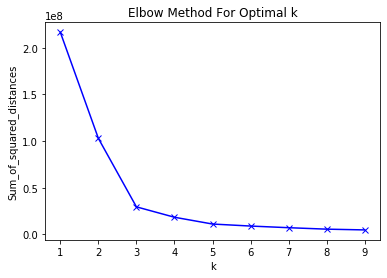

In [52]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [53]:
K = 3
attempts=10

In [54]:
_, labels_elbow, (centers_elbow) = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

In [55]:
centers_elbow = np.uint8(centers_elbow)

In [57]:
res = centers_elbow[labels_elbow.flatten()]
result_image = res.reshape((img.shape))

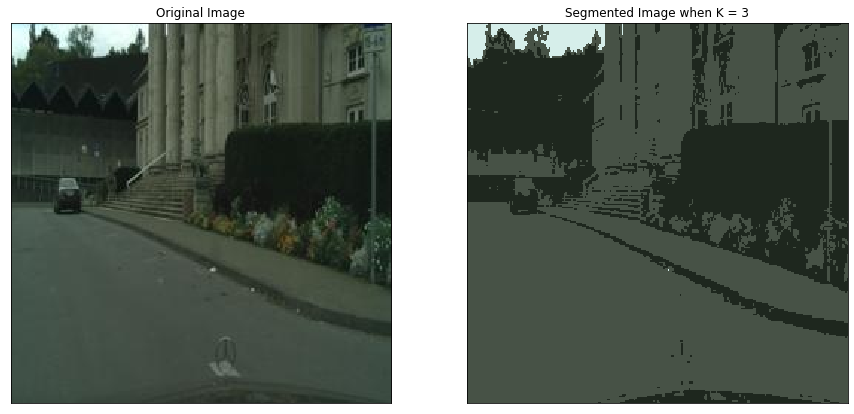

In [58]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

<div dir='rtl'style="text-align: right">
مشاهده کردیم که k =3 از روش البو حاصل شد .در ادامه تعداد پیکسل های حاصل از سه خوشه و مختصاتسان را جهت ارزیابی و اشتراک گیری با تصویر ground truth میبینیم.
</div> 

In [266]:
p=np.where(labels_elbow==0)
q=p[0]
q.shape

(42691,)

In [257]:
a=np.where(labels_elbow==1)  
b=a[0]
b.shape

(21479,)

In [279]:
c=np.where(labels_elbow==2)
d=c[0]
d.shape

(1366,)

<div dir='rtl'style="text-align: right">
حاصل اشتراک خوشه ی اول با لیبل 0 با کلاس علایم راهنمایی رانندگی در تصویر groungd truth.میبینیم که از بین 42691 پیکسل که در تصویر متعلق به لیبل صفر است 218 پیکسل مشترک با رنگ زرد موجود است. این کارا تا انتها به تعداد هشت خوشه در تصویر ground truth میگیریم و بیشترین را به عنوان لببل درست در نظر میگیریم.
</div> 

In [267]:
aa=np.intersect1d(q,f)
aa.shape
#belong to yellow

(218,)

In [268]:
aa1=np.intersect1d(q,h)
aa1.shape
#belong to light purple

(4173,)

In [269]:
aa2=np.intersect1d(q,j)
aa2.shape
#belong to black

(2761,)

In [270]:
aa3=np.intersect1d(q,l)
aa3.shape
#belong to gray

(12738,)

In [271]:
aa4=np.intersect1d(q,n)
aa4.shape
#belong to light blue 

(535,)

In [274]:
aa5=np.intersect1d(q,p)
aa5.shape
#belong to dark purple

(20298,)

In [275]:
aa6=np.intersect1d(q,s)
aa6.shape
#belong to dark blue

(144,)

In [276]:
aa7=np.intersect1d(q,u)
aa7.shape
#belong to green

(1824,)

<div dir='rtl'style="text-align: right">
در نهایت با محاسبه همه ی هشت خوشه و استراک آن ها با خوشه ی اول تصویرمان ،متوجه میشویم که بیشترین تعداد لیبل در این ناحیه متعلق به رنگ بنفش تیره است که هملن کلاس جاده است.
پس خوشه ی اول ما بیشترین اشتراک را با کلاس جاده دارد و تعداد لیبل صحیح مشخص شده است  
</div> 

In [277]:
max_q=max(aa7.shape,aa6.shape,aa5.shape , aa1.shape,aa4.shape,aa3.shape,aa2.shape,aa.shape)
max_q
# label 0 belong to road

(20298,)

<div dir='rtl'style="text-align: right">
در ادامه برای خوشه ی دوم با لیبل 1 دقیقا همان کار را ادامه میدهیم تا تعداد لیبل صحیح را محاسبه کنیم.
</div> 

In [258]:
bb=np.intersect1d(b,f)
#belong to yellow
bb.shape

(31,)

In [259]:
bb1=np.intersect1d(b,h)
#belong to light_purple(road)
bb1.shape

(1224,)

In [260]:
bb2=np.intersect1d(b,j)
#belong to black
bb2.shape

(1349,)

In [261]:
bb3=np.intersect1d(b,l)
#belong to  gray
bb3.shape

(7952,)

In [262]:
bb4=np.intersect1d(b,n)
#belong to light blue
bb4.shape

(178,)

In [263]:
bb5=np.intersect1d(b,p)
#belong to light dark_purple
bb5.shape

(375,)

In [264]:
bb6=np.intersect1d(b,s)
#belong to dark blue
bb6.shape

(243,)

In [265]:
bb7=np.intersect1d(b,u)
#belong to light green
bb7.shape

(10127,)

<div dir='rtl'style="text-align: right">
مشاهده میکنیم که بیشترین تعداد پیکسل مشترک مربوط به رنگ سبز بوده است . پس در این حالی لیبل 1 به لیبل 7 در تصویر ground truth نظر شده است.
یعنی از بین 21479 تعداد پیکسل که در تصویر لیبل 1 خورده اند 10127  تا از آن ا مربوط به رنگ سبز یعنی لیبل شماره هفت هستند.
</div> 

In [278]:
 max_b=max(bb7.shape,aa6.shape,(bb5.shape + bb1.shape),bb4.shape,bb3.shape,bb2.shape,bb.shape)
#label 1 belong to green
max_b

(10127,)

<div dir='rtl'style="text-align: right">
در ادامه برای خوشه ی سوم با لیبل 2 دقیقا همان کار را ادامه میدهیم تا تعداد لیبل صحیح را محاسبه کنیم.
</div> 

In [280]:
dd=np.intersect1d(d,f)
#belong to yellow
dd.shape

(0,)

In [281]:
dd1=np.intersect1d(d,h)
#belong to light_purple(road)
dd1.shape

(1,)

In [282]:
dd2=np.intersect1d(d,j)
#belong to black
dd2.shape

(113,)

In [283]:
dd3=np.intersect1d(d,l)
#belong to light gray
dd3.shape

(98,)

In [284]:
dd4=np.intersect1d(d,n)
#belong to light blue
dd4.shape

(985,)

In [285]:
dd5=np.intersect1d(d,p)
#belong to light dark_purple
dd5.shape

(0,)

In [286]:
dd6=np.intersect1d(d,s)
#belong to dark blue
dd6.shape

(0,)

In [287]:
dd7=np.intersect1d(d,u)
#belong to light green
dd7.shape

(169,)

<div dir='rtl'style="text-align: right">
لیبل شماره 2 هم در تصویر با لیبل شماره 4 نظیر شده است و تعداد پیکسل صحیح را نشان میدهد.
در این قسمت به تفکیک نظیر شدن لیبل ها بهم و تعداد درستشان را محاسبه کردیم.
پس از بین 1366 پیکسل که لیبل 2 خورده اند ،985 تای آن ها درست لیبل زده شده اند 
</div> 

In [288]:
max_d=max(dd7.shape,dd6.shape,dd5.shape,dd4.shape,dd3.shape,dd2.shape,dd1.shape,dd.shape)
max_d
#light blue

(985,)

<div dir='rtl'style="text-align: right">
  از 65536جمع کل لیبل های صحیح :985 +10127+20298 =31410
</div> 

<div align='right'>
    <h1>PCA</h1>
<div dir='rtl'style="text-align: right">
برای PCA ابتدا باید داده های خود را استاندارد کنیم و سپس عملیات PCA را روی آن ها انجام دهیم.آنها  اعمال میکنیم. تعداد componant هارو 2 در نظر میگیریم . یعنی کانال ما که 3 بود را به 2 کم کردیم تا تاثیر pca را روی دقت ببینیم.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(vectorized)
vectorized = scaler.transform(vectorized)

In [209]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components=2)

In [210]:
pca.fit(vectorized)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [211]:
pca.n_components_

2

In [212]:
vectorized = pca.transform(vectorized)

In [213]:
vectorized.shape

(65536, 2)

In [214]:
vectorized = np.float32(vectorized)

In [215]:
criteria = (cv2.TermCriteria_EPS + cv2.TermCriteria_MAX_ITER,10,1.0)

In [216]:
K=8
attempts = 10

In [217]:
_, labels_pca, (centers_pca) = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

In [218]:
centers_pca= np.uint8(centers_pca)

In [219]:
res = centers_pca[labels_pca.flatten()]
result_image= res.reshape((256*256),2)
result_image.shape

(65536, 2)

In [220]:
arr_pca=[]
arr2_pca=[]
for i in  np.unique(labels_pca):
    qq = np.where(labels_pca==i)
    pp=qq[0]
    max_match_pca=0
    for j in np.unique(labels_gd):
        kk = np.where(labels_gd==j)
        tt=kk[0]
        aa1_pca=np.intersect1d(pp,tt)
        arr_pca=aa1_pca.shape[0]
        #print(arr)
        if arr_pca> max_match_pca:
            max_match_pca=arr_pca
    print(max_match_pca)
    arr2_pca.append(max_match_pca)
max_truth_pca=0
for vv in arr2_pca:
    max_truth_pca+=vv
print("the total number of true labels:",max_truth_pca) 

2351
105
20128
107
5508
859
7772
128
the total number of true labels: 36958



<div dir='rtl'style="text-align: right">
    مشاهده میکنیم که دقت کمی کمتر از حالت قبلی شده است.در واقع PCA همانند رگولاریزشن عمل میکند . یعنی سرعت اجرای الگوریتم را بالا میبرد ولی دقت را  کم میکند.چون ما مقداری از اطلاعات را دست میدهیم.

In [221]:
print("the accuracy of the Kmeans with k=8 and n_componants=2 :",(max_truth_pca/vectorized.shape[0])*100)

the accuracy of the Kmeans with k=8 and n_componants=2 : 56.3934326171875


In [138]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(vectorized)
    Sum_of_squared_distances.append(km.inertia_)

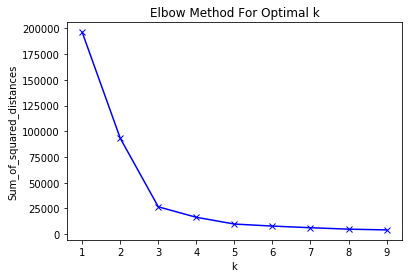

In [139]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [140]:
K=3
attempts = 10

In [141]:
_, labels_pca2, (centers_pca2) = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

In [142]:
centers_pca2= np.uint8(centers_pca2)

In [143]:
arr_pca=[]
arr2_pca=[]
for i in  np.unique(labels_pca2):
    qq = np.where(labels_pca==i)
    pp=qq[0]
    max_match_pca=0
    for j in np.unique(labels_gd):
        kk = np.where(labels_gd==j)
        tt=kk[0]
        aa1_pca=np.intersect1d(pp,tt)
        arr_pca=aa1_pca.shape[0]
        #print(arr)
        if arr_pca> max_match_pca:
            max_match_pca=arr_pca
    print(max_match_pca)
    arr2_pca.append(max_match_pca)
max_truth_pca=0
for vv in arr2_pca:
    max_truth_pca+=vv
print("the total number of true labels:",max_truth_pca) 

20126
6721
970
the total number of true labels: 27817


In [144]:
print("the accuracy of the Kmeans with k=3 and n_componants=2 :",(max_truth_pca/vectorized.shape[0])*100)

the accuracy of the Kmeans with k=3 and n_componants=2 : 42.44537353515625


<div dir='rtl'style="text-align: right">
مشاهده میکنیم که روی k =3 با تعداد componant 2 دقت چه قدر است.

<div align='left'>
    <h1>FCM</h1>
    <p>In this code we are going to segmente the image using FCM clustering method.</p>
    <p>At first we import required libraries:</p>
</div> 

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import cdist

<div align='left'>
    <p>Then we read our image and plot it:</p>
</div> 

In [2]:
image = cv2.imread('D:/desktop folders/extra/هوش محاسباتی/4/original.jpg')

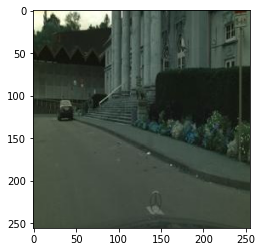

In [3]:
plt.imshow(image, cmap='gray')

<div align='left'>
    <p>We reshape our image in a way that it would be an array with width * height rows and 3 columns:</p>
</div> 

In [4]:
data = image.reshape((-1, 3))
data.shape

(65280, 3)

<div align='left'>
    <h1>Elbow Method for FCM</h1>
    <p>A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. So we are using <strong>Elbow Method</strong> to determine this optimal value of k. </p>
    <p>We now define the following:
        <br>
        <strong>Distortion</strong>: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.(centers in each loop, are calculated by cmeans algorithm from skfuzzy library and squared distances from the cluster centers is calculated and added to distortions.)</p>
</div> 

In [5]:
distortions = []  
results = {}  
K = range(1,10) 
  
for k in K: 
    centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data.T, k, 2, error=0.005, maxiter=5000, init=None)     
      
    distortions.append(sum(np.min(cdist(data, centers, 
                      'euclidean'),axis=1)) / data.shape[0])  
  
    results[k] = sum(np.min(cdist(data, centers, 
                 'euclidean'),axis=1)) / data.shape[0] 


<div align='left'>
    <p>Then we visualize the results and see that the optimal value for <strong>k</strong> is <strong>3</strong>.</p>
</div> 

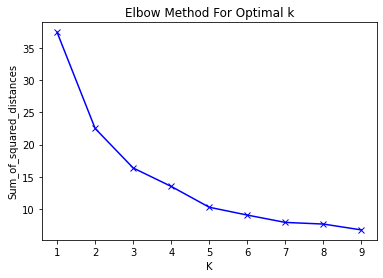

In [6]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('K') 
plt.ylabel('Sum_of_squared_distances') 
plt.title('Elbow Method For Optimal k') 
plt.show() 

<div align='left'>
    <p>Another way for finding optimal value for k is by using fpcs:</p>
    <p>We run FCM clustering for various numbers of clusters ranged from 2 to 9, and we store the fpcs for later to plot the fuzzy partition coefficient(We plot the results for better undrestanding of clusters.).</p>
</div> 

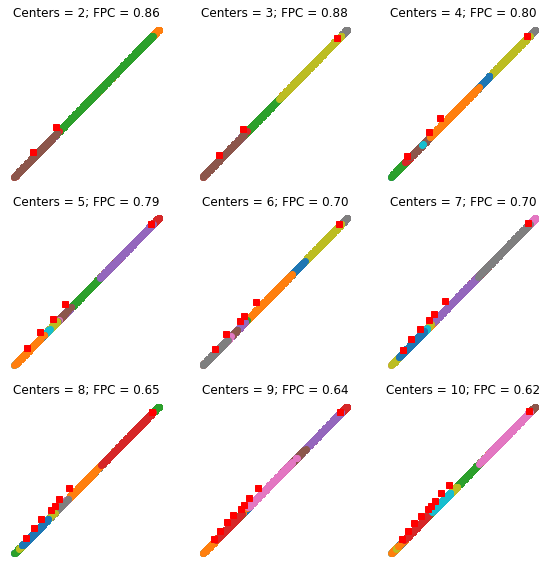

In [8]:
figure, axes1 = plt.subplots(3, 3, figsize=(8, 8))
fpcs = []

for k, ax in enumerate(axes1.reshape(-1), 2):
    centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data.T, k, 2, error=0.005, maxiter=1000, init=None)
    
    fpcs.append(fpc)

    img_clustered = np.argmax(u, axis=0)
    for k1 in range(k):
        ax.plot(data[img_clustered == k1],
                data[img_clustered == k1],  'o',
             label='series ' + str(k1))

    for cn in centers:
        ax.plot(cn[0], cn[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(k, fpc))
    ax.axis('off')

figure.tight_layout()

<div align='left'>
    <p>We can see that with <strong>k = 3 </strong>we have the most fpc, so <strong>3</strong> is our optimal value.</p>
</div> 

Text(0, 0.5, 'Fuzzy_partition_coefficient')

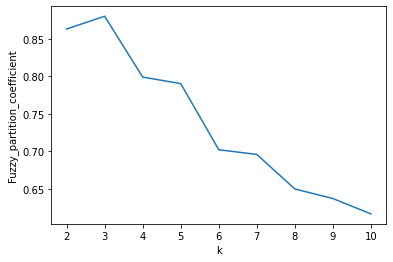

In [9]:
figure2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("k")
ax2.set_ylabel("Fuzzy_partition_coefficient")

<div align='left'>
    <h1>FCM clustering using optimal value</h1>
    <p>First we initialize our parameters(#center(k) is initialized with the optimal value drived by Elbow Method):</p>
</div> 

In [10]:
k = 3
fuzziness_degree = 2
error = 0.005
maxiter = 1000

<div align='left'>
    <p>We run cmeans from skfuzzy library for 3 centers:
    (we fetch a matrix for centers in first stage and then run cmeans with that matrix in second stage to get u matrix.)</p>
</div> 

In [11]:
centers, _, _, _, jm, _, _ = fuzz.cluster.cmeans(data.T, k, fuzziness_degree, error, maxiter, init = None)
u, _, _, _, _, _ = fuzz.cluster.cmeans_predict(data.T, centers, fuzziness_degree, error, maxiter)

<div align='left'>
    <p>By using u matrix, for every pixel of the image we find the closest cluster center and assign a label of that cluster to the corresponding pixel:</p>
</div> 

In [12]:
img_clustered = np.argmax(u, axis=0).astype(int)
print (img_clustered)
print (centers)

[1 1 1 ... 0 0 0]
[[ 70.47314198  82.65050017  71.45562975]
 [237.1786322  241.16293284 217.13831473]
 [ 29.56864571  38.00369721  29.5132767 ]]


<div align='left'>
    <p>Then we generate our clustered image by assigning unique colors to every label:</p>
</div> 

In [13]:
center_base_color = np.uint8([[0,0,0],[255,0,0],[255,255,255], [255,255,0],[0,0,255],[0,255,255],[255,0,255]])
cv2.imwrite('D:/desktop folders/extra/هوش محاسباتی/4/generated.jpg', center_base_color[img_clustered].reshape((image.shape)))

True

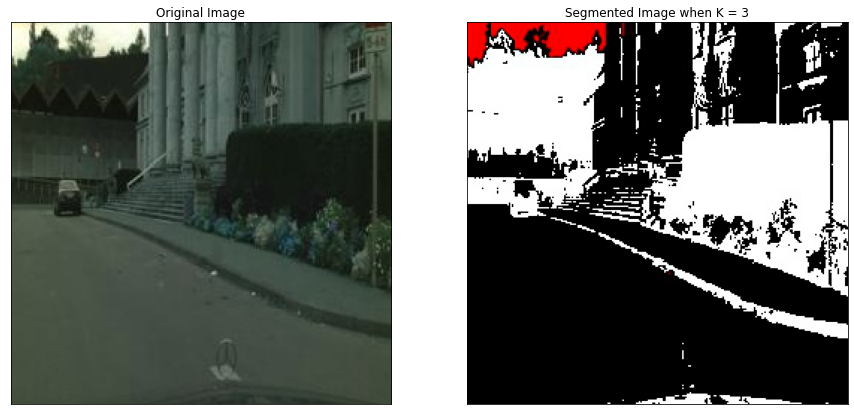

In [14]:
result_img = cv2.imread('D:/desktop folders/extra/هوش محاسباتی/4/generated.jpg')
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_img)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

<div align='left'>
    <h1>FCM clustering using cluster numbers of ground truth</h1>
    <p>First we initialize our parameters(#center(k) is initialized with cluster numbers of ground truth):</p>
</div> 

In [39]:
k = 5
fuzziness_degree = 2
error = 0.005
maxiter = 1000

<div align='left'>
    <p>We run cmeans from skfuzzy library for 5 centers:
    (we fetch a matrix for centers in first stage and then run cmeans with that matrix in second stage to get u matrix.)</p>
</div> 

In [40]:
centers, _, _, _, jm, _, _ = fuzz.cluster.cmeans(data.T, k, fuzziness_degree, error, maxiter, init = None)
u, _, _, _, _, _ = fuzz.cluster.cmeans_predict(data.T, centers, fuzziness_degree, error, maxiter)

<div align='left'>
    <p>By using u matrix, for every pixel of the image we find the closest cluster center and assign a label of that cluster to the corresponding pixel:</p>
</div> 

In [41]:
img_clustered = np.argmax(u, axis=0).astype(int)
print (img_clustered)
print (centers)

[4 4 4 ... 2 2 2]
[[ 23.00773974  29.5904296   22.1115888 ]
 [ 44.72257918  56.88855614  47.03005144]
 [ 69.13972466  80.56247686  69.10698088]
 [ 90.00152599 105.81239235  95.60793764]
 [241.07737529 244.7655566  220.68313338]]


<div align='left'>
    <p>Then we generate our clustered image by assigning unique colors to every label:</p>
</div> 

In [42]:
center_base_color = np.uint8([[0,0,0],[255,0,0],[255,255,255], [255,255,0],[0,0,255],[0,255,255],[255,0,255]])
cv2.imwrite('D:/desktop folders/extra/هوش محاسباتی/4/generated2.jpg', center_base_color[img_clustered].reshape((image.shape)))

True

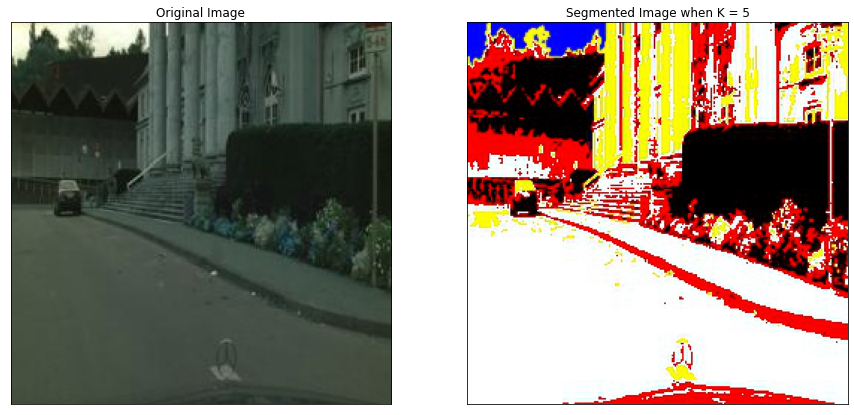

In [43]:
result_img = cv2.imread('D:/desktop folders/extra/هوش محاسباتی/4/generated2.jpg')
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_img)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

<div align='left'>
    <h1>FCM clustering on ground truth</h1>
    <p>Because of the noise on ground truth image we run FCM clustering on ground truth, so we have unique labels for every cluster.</p>
    <p>First we load ground truth image:</p>
</div> 

In [44]:
ground_truth = cv2.imread('D:/desktop folders/extra/هوش محاسباتی/4/ground_truth2.jpg')
ground_truth.shape

(256, 256, 3)

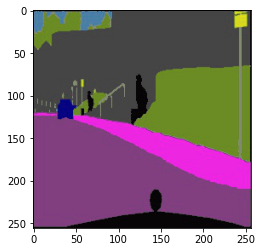

In [45]:
plt.imshow(ground_truth, cmap='gray')

<div align='left'>
    <p>We reshape ground truth in a way that it would be an array with width * height rows and 3 columns:</p>
</div> 

In [46]:
data2 = ground_truth.reshape((-1, 3))

<div align='left'>
    <p>First we initialize our parameters(#center(k) is initialized with number of clusteres in ground truth):</p>
</div> 

In [47]:
k = 5
fuzziness_degree = 2
error = 0.005
maxiter = 1000

<div align='left'>
    <p>We run cmeans from skfuzzy library for 5 centers:
    (we fetch a matrix for centers in first stage and then run cmeans with that matrix in second stage to get u matrix.)</p>
</div> 

In [48]:
centers2, _, _, _, jm, _, _ = fuzz.cluster.cmeans(data2.T, k, fuzziness_degree, error, maxiter, init = None)
u, _, _, _, _, _ = fuzz.cluster.cmeans_predict(data2.T, centers2, fuzziness_degree, error, maxiter)

<div align='left'>
    <p>By using u matrix, for every pixel of ground truth we find the closest cluster center and assign a label of that cluster to the corresponding pixel:</p>
</div> 

In [49]:
img_clustered2 = np.argmax(u, axis=0).astype(int)
print (img_clustered2)
print (centers2)

[3 3 3 ... 3 3 3]
[[ 69.16259694  69.23391645  69.41506005]
 [236.10141581  38.67949502 225.33629314]
 [128.61589964  64.00051665 128.08534879]
 [  8.16221676   5.58696648   8.29960135]
 [107.60993605 139.80428294  37.97023691]]


<div align='left'>
    <p>Then we generate our clustered ground truth by assigning unique colors to every label:</p>
</div> 

In [50]:
center2 = np.uint8([[255,0,0],[255,255,0],[0,255,255],[125,125,125],[229,0,255],[0,0,0],[255,255,255],[0,0,255],[0,255,0]])
cv2.imwrite('D:/desktop folders/extra/هوش محاسباتی/4/ground_truth3.jpg', center2[img_clustered2].reshape((ground_truth.shape)))

True

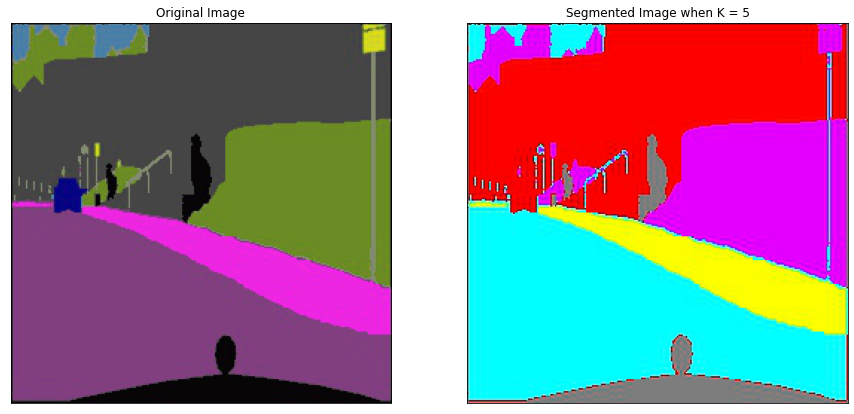

In [51]:
result_img = cv2.imread('D:/desktop folders/extra/هوش محاسباتی/4/ground_truth3.jpg')
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(ground_truth)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_img)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

<div align='left'>
    <h1>ٍEvaluation</h1>
    <p>For evaluation, we compare ground truth and clustered image labels and found the maximum intersection between labels. In that way we can find which cluster of ground truth reffers to which cluster of clustered image. And then we divide that intersection by number of whole pixels:</p>
</div> 

In [34]:
def Evaluate(predict_lables, truth_lables):
    arr=[]
    arr2=[]
    for i in  np.unique(predict_lables):
        q = np.where(predict_lables==i)
        p=q[0]
        max_match=0
        for j in np.unique(truth_lables):
            k = np.where(truth_lables==j)
            t=k[0]
            aa1=np.intersect1d(p,t)
            arr=aa1.shape[0]
            #print(arr)
            if arr> max_match:
                max_match=arr
        arr2.append(max_match)
    
    max_truth=0
    for v in arr2:
        max_truth+=v
    
    print("the total number of true labels:",max_truth)
    return max_truth

<div align='left'>
    <p>(img_clustered2 is our ground_truth clustered data and img_clustered is our clustered data (original image)).</p>
</div>

In [35]:
max_truth = Evaluate(img_clustered2,img_clustered)

the total number of true labels: 42950


In [36]:
print("the accuracy of the FCM with k=5 :",(max_truth/data2.shape[0])*100)

the accuracy of the FCM with k=5 : 65.5364990234375


<div align='left'>
    <h1>FCM using PCA</h1>
    <p>Now we are going to decrease our dimensions, running FCM again and see the results(we import PCA from sklearn library):</p>
</div> 

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [38]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [52]:
data_pca = pca.transform(data)
data_pca.shape

(65280, 2)

<div align='left'>
    <p>We are going to repeat FCM levels on the generated data with 2 dimensions:</p>
</div> 

<div align='left'>
    <h1>Ellbow Method (PCA)</h1>
    <p>Calculating <strong>Ellbow Method</strong> on pca data:</p>
</div> 

In [53]:
distortions2 = []  
results2 = {}  
K = range(1,10) 
  
for k in K: 
    centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data_pca.T, k, 2, error=0.005, maxiter=5000, init=None)     
      
    distortions2.append(sum(np.min(cdist(data_pca, centers, 
                      'euclidean'),axis=1)) / data_pca.shape[0])  
  
    results2[k] = sum(np.min(cdist(data_pca, centers, 
                 'euclidean'),axis=1)) / data_pca.shape[0] 

<div align='left'>
    <p>From Elbow method we find out optimal k for pca data is 3</p>
</div> 

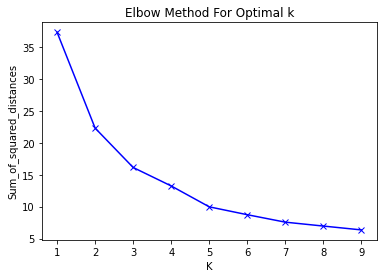

In [54]:
plt.plot(K, distortions2, 'bx-') 
plt.xlabel('K') 
plt.ylabel('Sum_of_squared_distances') 
plt.title('Elbow Method For Optimal k') 
plt.show()

<div align='left'>
    <h1>FCM on pca data with optimal k</h1>
    <p>We run cmeans from skfuzzy library for 3 centers for pca data:</p>
</div> 

In [55]:
k = 3
fuzziness_degree = 2
error = 0.005
maxiter = 1000

In [56]:
centers, _, _, _, jm, _, _ = fuzz.cluster.cmeans(data_pca.T, k, fuzziness_degree, error, maxiter, init = None)
u, _, _, _, _, _ = fuzz.cluster.cmeans_predict(data_pca.T, centers, fuzziness_degree, error, maxiter)

In [57]:
img_clustered3 = np.argmax(u, axis=0).astype(int)
print (img_clustered3)
print (centers)

[0 0 0 ... 2 2 2]
[[289.58507961   9.1921125 ]
 [-56.11836595   1.53531544]
 [ 17.49304898  -0.76685133]]


In [58]:
center_base_color = np.uint8([[0,0,0],[255,0,0],[255,255,255], [255,255,0],[0,0,255],[0,255,255],[255,0,255]])
cv2.imwrite('D:/desktop folders/extra/هوش محاسباتی/4/generated3.jpg', center_base_color[img_clustered3].reshape((image.shape)))

True

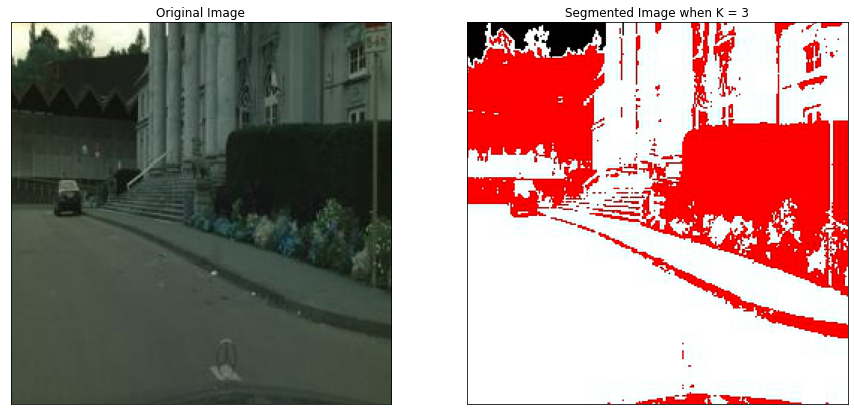

In [59]:
result_img = cv2.imread('D:/desktop folders/extra/هوش محاسباتی/4/generated3.jpg')
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_img)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

<div align='left'>
    <h1>FCM on pca data with number of clusters</h1>
    <p>We run cmeans from skfuzzy library for 5 centers for pca data:</p>
</div> 

In [60]:
k = 5
fuzziness_degree = 2
error = 0.005
maxiter = 1000

In [61]:
centers, _, _, _, jm, _, _ = fuzz.cluster.cmeans(data_pca.T, k, fuzziness_degree, error, maxiter, init = None)
u, _, _, _, _, _ = fuzz.cluster.cmeans_predict(data_pca.T, centers, fuzziness_degree, error, maxiter)

In [62]:
img_clustered4 = np.argmax(u, axis=0).astype(int)
print (img_clustered4)
print (centers)

[4 4 4 ... 1 1 1]
[[-2.63503062e+01 -8.83121561e-01]
 [ 1.41733685e+01  2.95783748e-02]
 [-6.90292010e+01  2.49035295e+00]
 [ 5.60754019e+01 -4.77808778e+00]
 [ 2.95955915e+02  9.34829771e+00]]


In [63]:
center_base_color = np.uint8([[0,0,0],[255,0,0],[255,255,255], [255,255,0],[0,0,255],[0,255,255],[255,0,255]])
cv2.imwrite('D:/desktop folders/extra/هوش محاسباتی/4/generated4.jpg', center_base_color[img_clustered4].reshape((image.shape)))

True

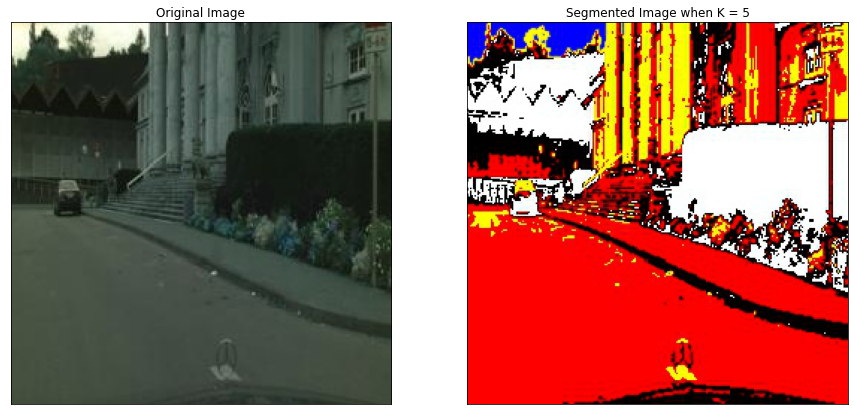

In [64]:
result_img = cv2.imread('D:/desktop folders/extra/هوش محاسباتی/4/generated4.jpg')
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_img)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

<div align='left'>
    <h1>Evaluation (PCA)</h1>
    <p>Now we have to evaluate our result and see the differences between running FCM on pca data(2D) and normal data(3D):</p>
    <p>(img_clustered2 is our ground_truth clustered data and img_clustered4 is our pca clustered data.)</p>
</div> 

In [65]:
max_truth2 = Evaluate(img_clustered2,img_clustered4)

the total number of true labels: 34275


In [66]:
print("the accuracy of the FCM on pca data with k=5 :",(max_truth2/data2.shape[0])*100)

the accuracy of the FCM on pca data with k=5 : 52.29949951171875


<div align='left'>
    <p>As you can see from results, running PCA on data it's like regularization, it speeds up calculation but it lowers accuracy.</p>
</div> 

<div align='left'>
    <h1>Conclusion</h1>
    <p> 1) Using FCM for segmenting images is more accurate that K_means.</p>
    <p> 2) For better clustering we can use differnet methods like elbow method or for FCM by using fpcs.</p>
    <p> 3) If we use PCA to lower the dimension of data, it'd speed up the calculation process of algorithms but it lowers accuracy as well.</p>
</div> 

<div align='center'>
    <h3>Negar Estaki , Leily Nourbakhsh</h3>
</div> 